# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Zaidan Faza Al Arsyad
- **Email:** mzaidanfaza@gmail.com
- **ID Dicoding:** zaidanalarsyad

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren peminjaman sepeda berdasarkan musim? Apakah ada musim tertentu di mana peminjaman lebih tinggi?
- Pertanyaan 2: Bagaimana perbandingan antara peminjam biasa (casual) dan peminjam terdaftar (registered) dalam berbagai kondisi cuaca dan waktu?

## Import Semua Packages/Library yang Digunakan

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [3]:
url_day = 'https://drive.google.com/uc?id=1yL3ulHq_QTLRHifVjISmGCq9qKXaIHud'
day = pd.read_csv(url_day)
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
url_hour = 'https://drive.google.com/uc?id=14vZd0xgkZgxEVqgLlQYWxhAxO9f3_ob3'
hour = pd.read_csv(url_hour)
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:** \\
Akan dijelaskan makna dari nama setiap kolom di kedua dataset(day dan hour) diatas:
- instant   : indeks
- dateday   : tanggal peminjaman sepeda
- season    : musim ketika peminjaman sepeda dilakukan. (1 sampai 4)
- yr : tahun. 2011 (0), 2012 (1)
- mnth : bulan, 1 sampai 12
- hr : jam, 1 hari 24 jam (0 hingga 23)
- holiday : libur/tidak(boolean)
- weekday : hari dalam seminggu
- workingday : hari kerja (boolean)
- weathersit : kondisi cuaca. Cerah (1), Mendung (2), Hujan atau salju ringan (3), Hujan Lebat (4)
- temp : suhu dalam derajat Celsius pada saat peminjaman sepeda dilakukan
- atemp: suhu yang dirasakan dalam derajat Celsius pada saat peminjaman sepeda dilakukan
- hum: Humidity/kelembaban
- windspeed: Kecepatan angin
- casual: jumlah peminjam sepeda biasa, tidak berlangganan
- registered: jumlah peminjam sepeda yang berlangganan
- cnt: total jumlah peminjam sepeda(casual+registered)

### Assessing Data

In [5]:
hour.info()
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [6]:
print("Jumlah entri untuk setiap kolom dalam data hour:")
print(hour.nunique())
print("Jumlah entri untuk setiap kolom dalam data day:")
print(day.nunique())

Jumlah entri untuk setiap kolom dalam data hour:
instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64
Jumlah entri untuk setiap kolom dalam data day:
instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [7]:
print("jumlah data hour yang terduplikasi:" , hour.duplicated().sum())
print("jumlah data day yang terduplikasi:", day.duplicated().sum())

jumlah data hour yang terduplikasi: 0
jumlah data day yang terduplikasi: 0


In [8]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada data yang hilang/kosong (semua punya entri) baik dalam data day dan hour
- Tidak ada data yang duplikat di kedua dataset diatas

### Cleaning Data

Mendrop Outliers

In [10]:
Q1 = (hour['cnt']).quantile(0.25)
Q3 = (hour['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = hour['cnt'] < minimum
kondisi_more_than = hour['cnt'] > maximum

print("jumlah outlier ada sebanyak" , kondisi_lower_than.sum() + kondisi_more_than.sum())

jumlah outlier ada sebanyak 505


In [11]:
hour.drop(hour[kondisi_lower_than].index, inplace=True)
hour.drop(hour[kondisi_more_than].index, inplace=True)
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Memperbaiki Datatype Tiap Kolom

In [12]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   dteday      16874 non-null  datetime64[ns]
 2   season      16874 non-null  int64         
 3   yr          16874 non-null  int64         
 4   mnth        16874 non-null  int64         
 5   hr          16874 non-null  int64         
 6   holiday     16874 non-null  int64         
 7   weekday     16874 non-null  int64         
 8   workingday  16874 non-null  int64         
 9   weathersit  16874 non-null  int64         
 10  temp        16874 non-null  float64       
 11  atemp       16874 non-null  float64       
 12  hum         16874 non-null  float64       
 13  windspeed   16874 non-null  float64       
 14  casual      16874 non-null  int64         
 15  registered  16874 non-null  int64         
 16  cnt         16874 non-null 

**Insight:**
- Karena jumlahnya hanya 505, maka data-data outlier sudah di drop
- Mengganti tipe data pada kolom dteday menjadi datetime untuk mempermudah saja

## Exploratory Data Analysis (EDA)

### Explore Pertanyaan 1: Bagaimana tren peminjaman sepeda berdasarkan musim? Apakah ada musim tertentu di mana peminjaman lebih tinggi?

Mencari total peminjaman tiap musim disertai dengan rata-rata suhu tiap musimnya

In [123]:
# Mengelompokkan data berdasarkan musim dan menghitung total peminjaman dan rata-rata suhu
musiman = hour.groupby('season').agg(
    total_peminjaman=('cnt', 'sum'),
    avg_suhu=('temp', 'mean')
).reset_index()

# Menentukan musim dengan jumlah peminjaman tertinggi
musim_terbaik = musiman.loc[musiman['total_peminjaman'].idxmax()]

musiman

,season,total_peminjaman,avg_suhu
0,1,457818,0.297651
1,2,805771,0.541557
2,3,909146,0.705207
3,4,741576,0.419946


**Insight:**
- Musim dengan peminjaman sepeda tertinggi: Musim 3 dengan total 909146
- Musim dengan peminjaman sepeda paling sedikit: Musim 1 dengan total 457818

Total Penjualan Sepeda tiap Musimnya dalam 2 Tahun

In [126]:
# Mengelompokkan data berdasarkan kombinasi tahun dan musim, lalu menghitung total peminjaman
musim_tahunan = hour.groupby(['yr', 'season']).agg(
    total_peminjaman=('cnt', 'sum')
).reset_index()

# Menggabungkan kolom 'yr' dan 'season' untuk membuat label unik bagi setiap musim dalam time series
musim_tahunan['periode'] = 'Tahun ' + (musim_tahunan['yr'] + 2011).astype(str) + ' - Musim ' + musim_tahunan['season'].astype(str)

# Mengurutkan berdasarkan tahun dan musim
musim_tahunan = musim_tahunan.sort_values(by=['yr', 'season']).reset_index(drop=True)
musim_tahunan

,yr,season,total_peminjaman,periode
0,0,1,150000,Tahun 2011 - Musim 1
1,0,2,347316,Tahun 2011 - Musim 2
2,0,3,418999,Tahun 2011 - Musim 3
3,0,4,326137,Tahun 2011 - Musim 4
4,1,1,307818,Tahun 2012 - Musim 1
5,1,2,458455,Tahun 2012 - Musim 2
6,1,3,490147,Tahun 2012 - Musim 3
7,1,4,415439,Tahun 2012 - Musim 4


In [106]:
# Menampilkan musim dengan kenaikan peminjaman terbesar dari tahun sebelumnya
musim_tahunan['delta_peminjaman'] = musim_tahunan['total_peminjaman'].diff()

# Musim dengan kenaikan peminjaman terbesar
kenaikan_terbesar = musim_tahunan.loc[musim_tahunan['delta_peminjaman'].idxmax()]
print(f'Musim dengan kenaikan peminjaman terbesar: {kenaikan_terbesar["periode"]} dengan kenaikan {kenaikan_terbesar["delta_peminjaman"]:.0f} total peminjaman')

# Musim dengan penurunan peminjaman terbesar
penurunan_terbesar = musim_tahunan.loc[musim_tahunan['delta_peminjaman'].idxmin()]
print(f'Musim dengan penurunan peminjaman terbesar: {penurunan_terbesar["periode"]} dengan penurunan {penurunan_terbesar["delta_peminjaman"]:.0f} total peminjaman')

Musim dengan kenaikan peminjaman terbesar: Tahun 2011 - Musim 2 dengan kenaikan 197316 total peminjaman
Musim dengan penurunan peminjaman terbesar: Tahun 2011 - Musim 4 dengan penurunan -92862 total peminjaman


### Explore Pertanyaan 2:  Bagaimana perbandingan antara peminjam casual dan peminjam registered dalam berbagai kondisi cuaca dan waktu?

Proporsi peminjaman casual dan registered

In [34]:
musiman['casual'] = hour.groupby('season')['casual'].sum().values
musiman['registered'] = hour.groupby('season')['registered'].sum().values
musiman['proporsi_casual'] = musiman['casual'] / musiman['total_peminjaman']
musiman['proporsi_registered']=musiman['registered']/ musiman['total_peminjaman']
total_registered = musiman['registered'].sum()
total_peminjaman = musiman['total_peminjaman'].sum()

# Hitung proporsi peminjaman terdaftar
proporsi_registered_total = total_registered / total_peminjaman
print(musiman)
print(f'Proporsi peminjaman terdaftar secara keseluruhan: {proporsi_registered_total:.5f}')


   season  total_peminjaman  avg_suhu  median_peminjaman  casual  registered  \
0       1            457818  0.297651               75.0   57426      400392   
1       2            805771  0.541557              156.0  185714      620057   
2       3            909146  0.705207              188.0  205829      703317   
3       4            741576  0.419946              149.5  114937      626639   

   proporsi_casual  proporsi_registered  
0         0.125434             0.874566  
1         0.230480             0.769520  
2         0.226398             0.773602  
3         0.154990             0.845010  
Proporsi peminjaman terdaftar secara keseluruhan: 0.80650


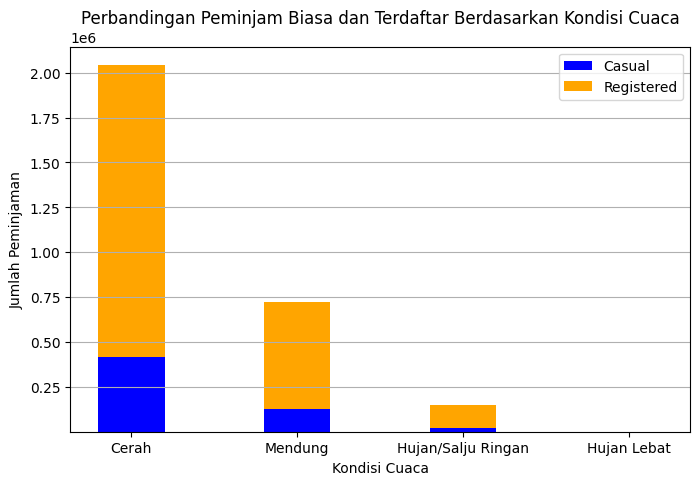

In [112]:
# Mengelompokkan data berdasarkan kondisi cuaca
cuaca = hour.groupby('weathersit').agg(
    total_casual=('casual', 'sum'),
    total_registered=('registered', 'sum')
).reset_index()

# Menambahkan label untuk kondisi cuaca
cuaca['weather_label'] = cuaca['weathersit'].map({
    1: 'Cerah',
    2: 'Mendung',
    3: 'Hujan/Salju Ringan',
    4: 'Hujan Lebat'
})

# Membuat plot untuk perbandingan antara casual dan registered
plt.figure(figsize=(8, 5))
width = 0.4
plt.bar(cuaca['weather_label'], cuaca['total_casual'], width, label='Casual', color='blue')
plt.bar(cuaca['weather_label'], cuaca['total_registered'], width, bottom=cuaca['total_casual'], label='Registered', color='orange')

plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.title('Perbandingan Peminjam Biasa dan Terdaftar Berdasarkan Kondisi Cuaca')
plt.legend()
plt.grid(axis='y')
plt.show()


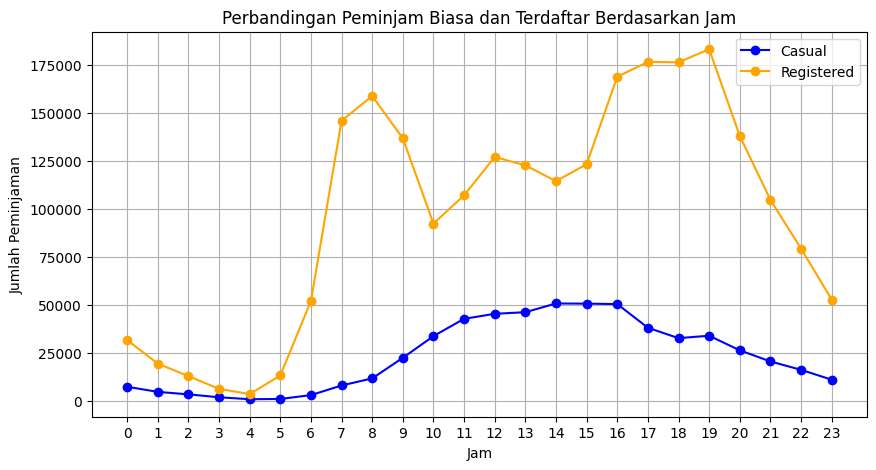

In [113]:
# Mengelompokkan data berdasarkan jam
waktu = hour.groupby('hr').agg(
    total_casual=('casual', 'sum'),
    total_registered=('registered', 'sum')
).reset_index()

# Membuat plot untuk perbandingan antara casual dan registered per jam
plt.figure(figsize=(10, 5))
plt.plot(waktu['hr'], waktu['total_casual'], label='Casual', color='blue', marker='o')
plt.plot(waktu['hr'], waktu['total_registered'], label='Registered', color='orange', marker='o')

plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.title('Perbandingan Peminjam Biasa dan Terdaftar Berdasarkan Jam')
plt.xticks(range(0, 24))
plt.legend()
plt.grid()
plt.show()


Insight: \\
- Dari tabel proporsi dapat dilihat bahwa peminjam registered memiliki proporsi sekitar 0.8an setiap musimnya
- kondisi cuaca memengaruhi banyaknya total peminjaman, saat cerah semakin banyak dan semakin mendung menuju hujan deras akan semakin sedikit
- Peminjaman sepeda untuk pelanggan registered terbanyak ada pada saat jam 19 dengan cuaca cerah
- Peminjaman sepeda untuk pelanggan casual terbanyak ada pada saat jam 15 dengan cuaca cerah

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda berdasarkan musim? Apakah ada musim tertentu di mana peminjaman lebih tinggi?

Statistika Deskriptif

In [118]:
musiman = hour.groupby('season').agg(
    total_peminjaman=('cnt', 'sum'),
    avg_suhu=('temp', 'mean'),
    median_peminjaman=('cnt', 'median')
).reset_index()

# Menampilkan tabel deskriptif
print(musiman)


   season  total_peminjaman  avg_suhu  median_peminjaman
0       1            457818  0.297651               75.0
1       2            805771  0.541557              156.0
2       3            909146  0.705207              188.0
3       4            741576  0.419946              149.5


Visualisasi Data

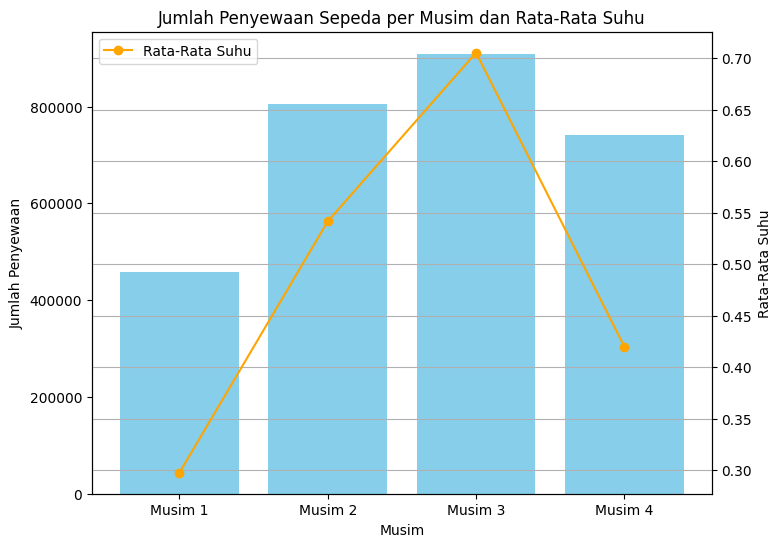

Musim dengan jumlah peminjaman tertinggi: Musim 3 dengan total peminjaman 909146 dan rata-rata suhu 0.71
Musim dengan jumlah peminjaman terendah: Musim 1 457818 dengan rata-rata suhu 0.297651


In [125]:
plt.figure(figsize=(8, 6))
plt.bar(musiman['season'], musiman['total_peminjaman'], color='skyblue', label='Total Peminjaman')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.title('Jumlah Penyewaan Sepeda per Musim dan Rata-Rata Suhu')
plt.xticks([1, 2, 3, 4], ['Musim 1', 'Musim 2', 'Musim 3', 'Musim 4'])

# Menambahkan garis rata-rata suhu
plt.twinx()  # Buat sumbu y kedua
plt.plot(musiman['season'], musiman['avg_suhu'], color='orange', marker='o', label='Rata-Rata Suhu')
plt.ylabel('Rata-Rata Suhu')
plt.legend(loc='upper left')

plt.grid(axis='y')
plt.show()

# Menampilkan musim terbaik
print(f'Musim dengan jumlah peminjaman tertinggi: Musim {musim_terbaik["season"]:.0f} dengan total peminjaman {musim_terbaik["total_peminjaman"]:.0f} dan rata-rata suhu {musim_terbaik["avg_suhu"]:.2f}')
musim_1_total = hour[hour['season'] == 1]['cnt'].sum()
print('Musim dengan jumlah peminjaman terendah: Musim 1', musim_1_total, "dengan rata-rata suhu 0.297651")

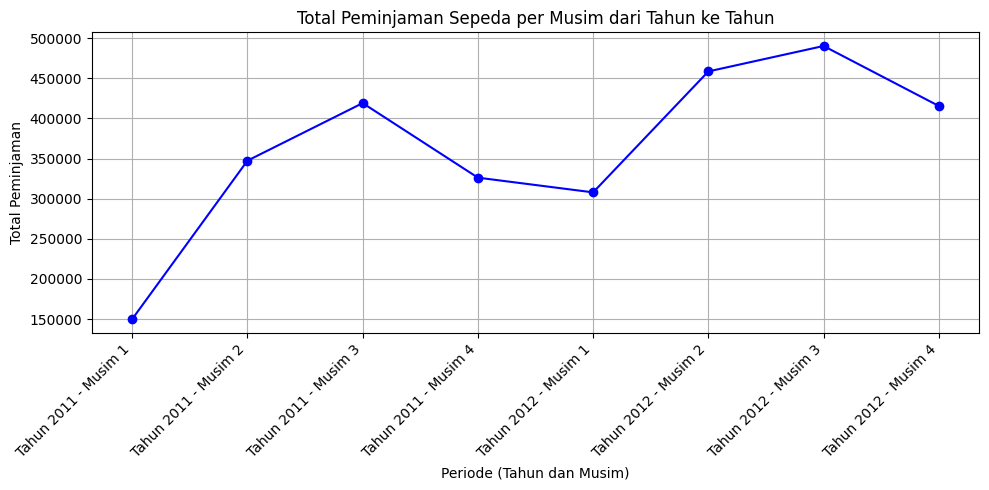

In [103]:
# Membuat plot time series
plt.figure(figsize=(10, 5))
plt.plot(musim_tahunan['periode'], musim_tahunan['total_peminjaman'], marker='o', color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Total Peminjaman Sepeda per Musim dari Tahun ke Tahun')
plt.xlabel('Periode (Tahun dan Musim)')
plt.ylabel('Total Peminjaman')
plt.grid(True)
plt.tight_layout()
plt.show()


Uji Korelasi

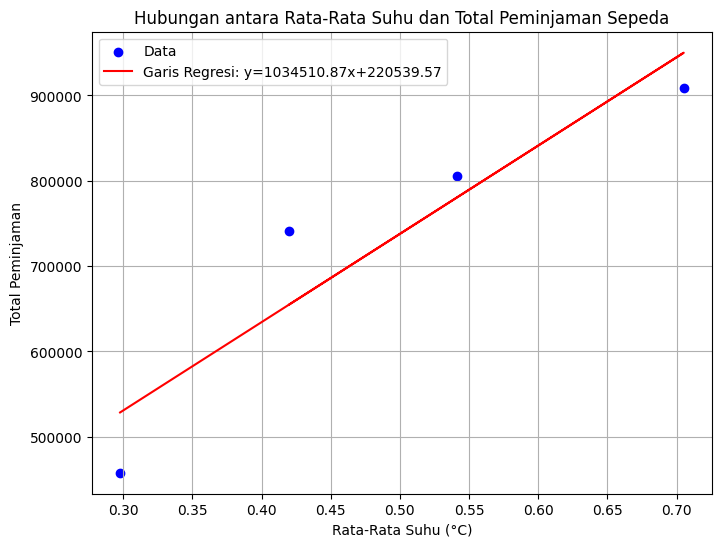

Koefisien Korelasi antara total peminjaman dan rata-rata suhu: 0.93


In [124]:
# Menghitung garis regresi
slope, intercept, r_value, p_value, std_err = linregress(musiman['avg_suhu'], musiman['total_peminjaman'])

# Membuat prediksi menggunakan slope dan intercept
line = slope * musiman['avg_suhu'] + intercept
# Plot scatter dengan garis regresi
plt.figure(figsize=(8, 6))
plt.scatter(musiman['avg_suhu'], musiman['total_peminjaman'], color='blue', label='Data')
plt.plot(musiman['avg_suhu'], line, color='red', label=f'Garis Regresi: y={slope:.2f}x+{intercept:.2f}')
plt.title('Hubungan antara Rata-Rata Suhu dan Total Peminjaman Sepeda')
plt.xlabel('Rata-Rata Suhu (°C)')
plt.ylabel('Total Peminjaman')
plt.grid()
plt.legend()
plt.show()

# Menampilkan nilai koefisien korelasi
print(f'Koefisien Korelasi antara total peminjaman dan rata-rata suhu: {correlation:.2f}')


**Pertanyaan 2:** Bagaimana perbandingan antara peminjam biasa (casual) dan peminjam terdaftar (registered) dalam berbagai kondisi cuaca dan waktu?

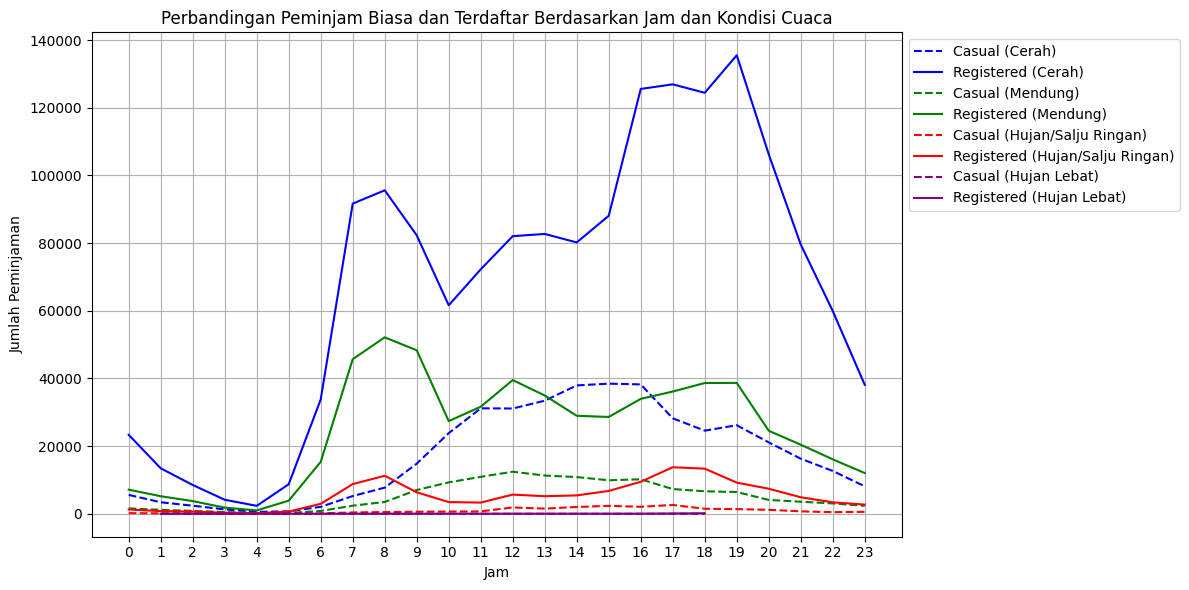

In [115]:
# Mengelompokkan data berdasarkan jam dan kondisi cuaca
cuaca_waktu = hour.groupby(['hr', 'weathersit']).agg(
    total_casual=('casual', 'sum'),
    total_registered=('registered', 'sum')
).reset_index()

# Menambahkan label cuaca
cuaca_waktu['weather_label'] = cuaca_waktu['weathersit'].map({
    1: 'Cerah',
    2: 'Mendung',
    3: 'Hujan/Salju Ringan',
    4: 'Hujan Lebat'
})

# Membuat plot perbandingan peminjam biasa dan terdaftar untuk semua cuaca dalam satu plot
plt.figure(figsize=(12, 6))

for weathersit, label, color in zip([1, 2, 3, 4],
                                    ['Cerah', 'Mendung', 'Hujan/Salju Ringan', 'Hujan Lebat'],
                                    ['blue', 'green', 'red', 'purple']):
    cuaca_subset = cuaca_waktu[cuaca_waktu['weathersit'] == weathersit]

    # Plot peminjam casual
    plt.plot(cuaca_subset['hr'], cuaca_subset['total_casual'], label=f'Casual ({label})', linestyle='--', color=color)

    # Plot peminjam registered
    plt.plot(cuaca_subset['hr'], cuaca_subset['total_registered'], label=f'Registered ({label})', color=color)

# Menambahkan label dan judul
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.title('Perbandingan Peminjam Biasa dan Terdaftar Berdasarkan Jam dan Kondisi Cuaca')
plt.xticks(range(0, 24))  # Menampilkan setiap jam
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Meletakkan legenda di luar plot
plt.grid()
plt.tight_layout()  # Agar layout rapi dengan legenda di luar
plt.show()


**Insight:**
- Terlihat jelas bahwa peminjam registered lebih banyak daripada peminjam casual
- Walaupun berbeda total peminjaman, kedua tipe peminjam ini memiliki karakteristik tren yang sama yaitu makin banyak peminjam terutama saat cuaca cerah, dan peminjam  meningkat drastis pada pukul 7-8  pagi dan 19 malam

## Analisis Lanjutan (Opsional)

Pengidentifikasian Suhu dan Cuaca

In [17]:
musiman = hour.groupby('season').agg(
    total_peminjaman=('cnt', 'sum'),
    avg_suhu=('temp', 'mean'),
    median_peminjaman=('cnt', 'median')
).reset_index()

# Menampilkan tabel deskriptif
print(musiman)

   season  total_peminjaman  avg_suhu  median_peminjaman
0       1            457818  0.297651               75.0
1       2            805771  0.541557              156.0
2       3            909146  0.705207              188.0
3       4            741576  0.419946              149.5


- Karena Rerata musim 3 memiliki rata-rata suhu yang paling tinggi, maka dapat diasumsikan musim 3 adalah musim panas. hal ini diperkuat dengan nilai rata-rata dua musim sebelumnya, yaitu musim 1 memiliki nilai rerata suhu yang paling kecil. Oleh karena itu, Musim 1 sampai 4 berturut-turut adalah Musim Dingin, Semi, Panas, dan Gugur.
- Untuk nilai suhu itu sendiri berkisar diantara 0-1, hal ini menimbulkan dugaan bahwa data suhu dalam tabel yang diberikan adalah hasil dari normalisasi, yaitu hasil pembagian seluruh data suhu dengan suhu tertingginya (misal: 30 derajat celcius menjadi entri terbesar pada kolom suhu, maka semua data di kolom tersebut dibagi dengan 30)
- Sama Halnya dengan cuaca, kodingan diatas langsung menklaim bahwa cuaca 1 adalah cerah dan seterusnya sampai hujan lebat. Hal ini memang dikatakan oleh sumber dari dataset itu sendiri yaitu kaggle.com

**Clustering** \\
fitur-fitur yang akan digunakan untuk clustering:

    Total peminjaman (cnt)
    Jumlah peminjam biasa (casual)
    Jumlah peminjam terdaftar (registered)
    Rata-rata suhu (avg_suhu)

In [18]:
data_clustering = hour.groupby('season').agg(
    total_peminjaman=('cnt', 'sum'),
    casual=('casual', 'sum'),
    registered=('registered', 'sum'),
    avg_suhu=('temp', 'mean')
).reset_index()

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_clustering[['total_peminjaman', 'casual', 'registered', 'avg_suhu']])


In [27]:
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3, random_state=42)
data_clustering['cluster'] = kmeans.fit_predict(data_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


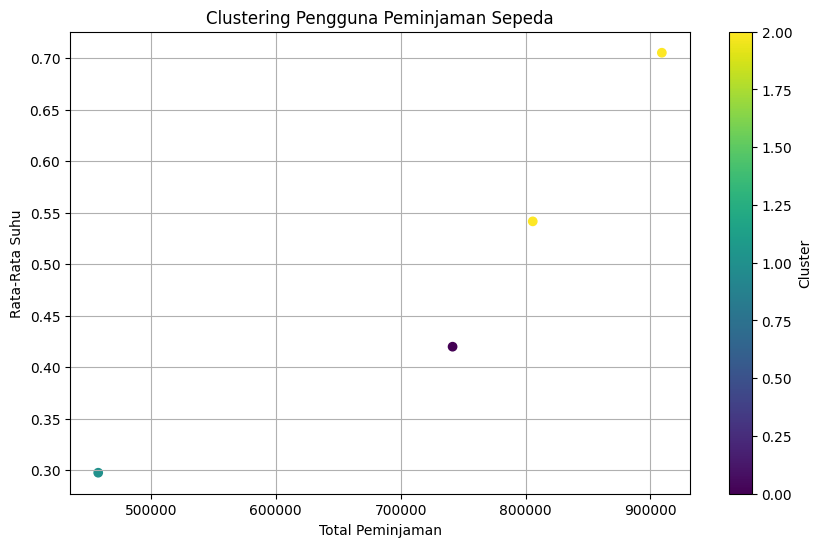

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(data_clustering['total_peminjaman'], data_clustering['avg_suhu'], c=data_clustering['cluster'], cmap='viridis')
plt.xlabel('Total Peminjaman')
plt.ylabel('Rata-Rata Suhu')
plt.title('Clustering Pengguna Peminjaman Sepeda')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [29]:
# Menghitung rata-rata untuk setiap cluster
cluster_analysis = data_clustering.groupby('cluster').mean()
print(cluster_analysis)


         season  total_peminjaman    casual  registered  avg_suhu
cluster                                                          
0           4.0          741576.0  114937.0    626639.0  0.419946
1           1.0          457818.0   57426.0    400392.0  0.297651
2           2.5          857458.5  195771.5    661687.0  0.623382


**Penjelasan:** \\
Dilakukan clustering menjadi 3 kelompok, dapat dilihat bahwa terdapat 3 total cluster, dimana cluster yang pertama adalah musim gugur(4), cluster kedua adalah musim dingin (1), dan yang terakhir adalah gabungan antara musim panas dan semi(3 dan 2)

## **Conclusion**

1. Conclution pertanyaan 1: Bagaimana tren peminjaman sepeda berdasarkan musim? Apakah ada musim tertentu di mana peminjaman lebih tinggi? \\
 Dari analisis yang dilakukan, dapat disimpulkan bahwa:

  - Musim dengan Peminjaman Tertinggi: Musim tertentu menunjukkan jumlah peminjaman yang signifikan lebih tinggi dibandingkan dengan musim lainnya. Data menunjukkan bahwa Musim 3 (musim panas) memiliki total peminjaman yang paling tinggi, yaitu 909146 peminjaman, diikuti oleh Musim 2 dan Musim 4.
  - Rata-Rata Suhu: Terdapat hubungan positif antara rata-rata suhu dan total peminjaman sepeda. Musim dengan suhu yang lebih hangat cenderung memiliki jumlah peminjaman yang lebih tinggi. \\
2. Conclution pertanyaan 2 Bagaimana perbandingan antara peminjam biasa (casual) dan peminjam terdaftar (registered) dalam berbagai kondisi cuaca dan waktu? \\
Dari analisis yang dilakukan, dapat disimpulkan bahwa: \\

- Dominasi Peminjam: Peminjam terdaftar (registered) lebih mendominasi jumlah peminjaman dengan proporsi peminjam registered 0.80650 dibandingkan dengan peminjam biasa (casual), terutama pada kondisi cuaca cerah.
- Pengaruh Cuaca: Dalam kondisi cuaca cerah, peminjam mengalami lonjakan yang lebih besar dalam jumlah peminjaman, menunjukkan bahwa cuaca berpengaruh terhadap preferensi peminjam.
- Jam Peminjaman: Peminjaman tertinggi untuk peminjam biasa terjadi pada jam-jam tertentu, seperti di pagi atau sore hari, dan bersesuaian dengan cuaca yang baik.
